In [13]:
# 필요한 라이브러리 불러오기
import pandas as pd

# 훈련 데이터 파일 경로
train_data_path = r'C:\Users\82106\Desktop\데이터분석 프로젝트\신약개발 AI경진대회\data\open\train.csv'

# 훈련 데이터 불러오기
train_data = pd.read_csv(train_data_path)

# 데이터의 구조 확인
print("훈련 데이터의 구조:")
print(train_data.shape)  # 행과 열의 개수를 출력합니다.

# 데이터의 처음 몇 행 확인 (데이터 샘플)
print("훈련 데이터 샘플:")
print(train_data.head())

# 데이터의 기본 통계 정보 확인
print("훈련 데이터의 기본 통계 정보:")
print(train_data.describe())



훈련 데이터의 구조:
(3498, 11)
훈련 데이터 샘플:
           id                                             SMILES     MLM  \
0  TRAIN_0000    CCOc1ccc(CNC(=O)c2cc(-c3sc(C)nc3C)n[nH]2)cc1OCC  26.010   
1  TRAIN_0001               Cc1nc(C)c(CN2CC(C)C(=O)Nc3ccccc32)s1  29.270   
2  TRAIN_0002                   CCCN1CCN(c2nn3nnnc3c3ccccc23)CC1   5.586   
3  TRAIN_0003  Cc1ccc(-c2ccc(-n3nc(C)c(S(=O)(=O)N4CCN(C5CCCCC...   5.710   
4  TRAIN_0004                Cc1ccc2c(c1)N(C(=O)c1ccncc1)CC(C)O2  93.270   

      HLM  AlogP  Molecular_Weight  Num_H_Acceptors  Num_H_Donors  \
0  50.680  3.259           400.495                5             2   
1  50.590  2.169           301.407                2             1   
2  80.892  1.593           297.358                5             0   
3   2.000  4.771           494.652                6             0   
4  99.990  2.335           268.310                3             0   

   Num_RotatableBonds   LogD  Molecular_PolarSurfaceArea  
0                   8  3.259       

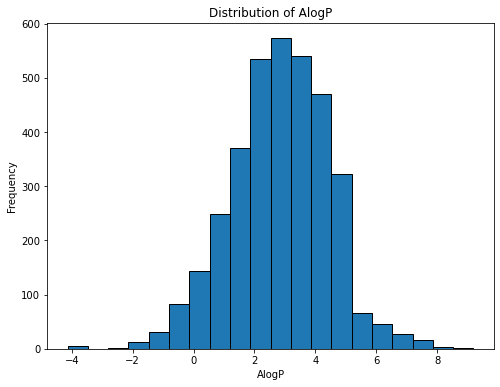

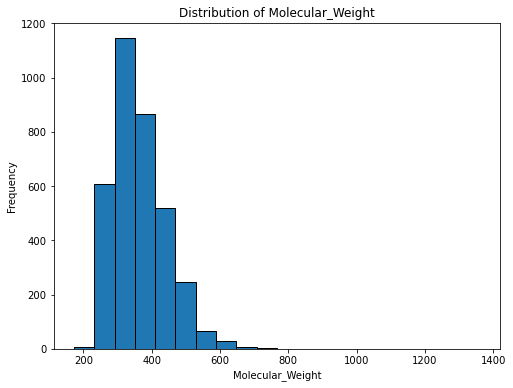

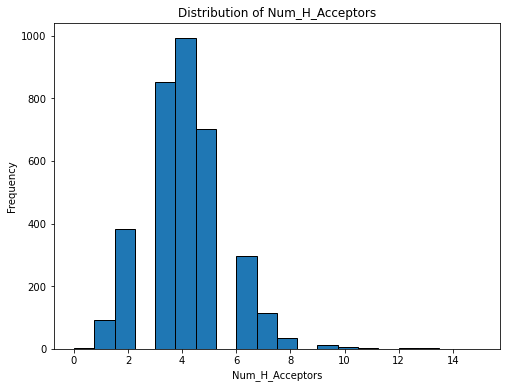

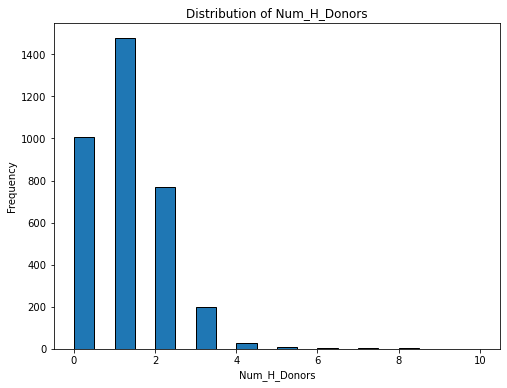

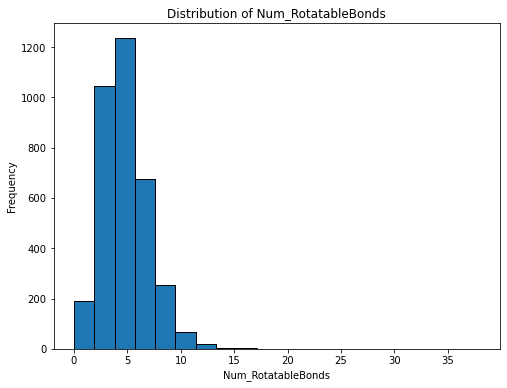

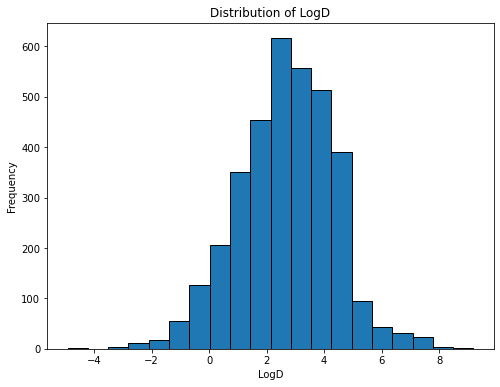

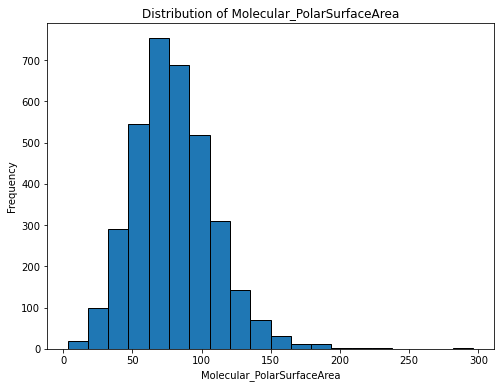

In [14]:
import matplotlib.pyplot as plt

# 숫자형 특성 목록
numeric_features = ['AlogP', 'Molecular_Weight', 'Num_H_Acceptors', 'Num_H_Donors', 'Num_RotatableBonds', 'LogD', 'Molecular_PolarSurfaceArea']

# 각 숫자형 특성에 대한 히스토그램을 그립니다.
for feature in numeric_features:
    plt.figure(figsize=(8, 6))
    plt.hist(train_data[feature], bins=20, edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()


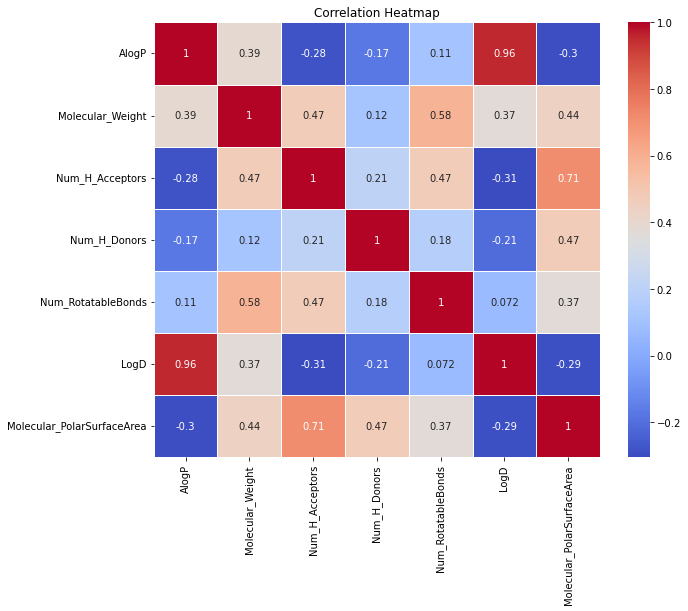

In [15]:
import seaborn as sns

# 숫자형 특성 간의 상관 행렬 계산
correlation_matrix = train_data[numeric_features].corr()

# 상관 행렬을 히트맵으로 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


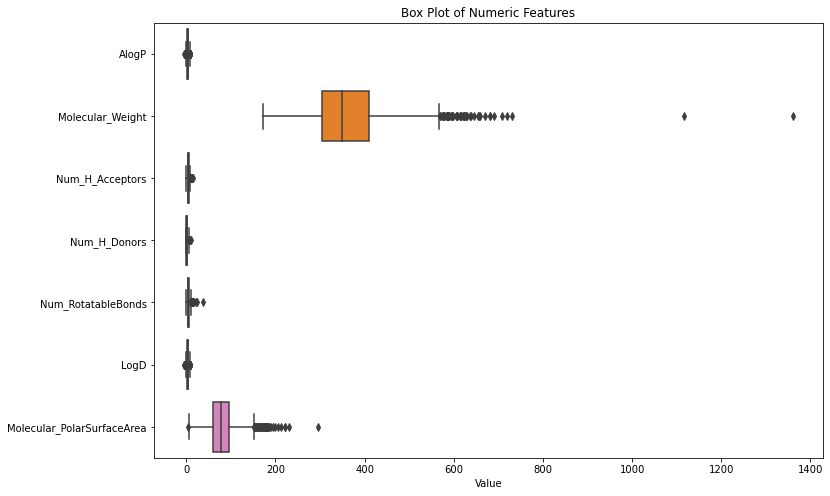

In [16]:
# 숫자형 특성에 대한 상자 그림(box plot) 시각화
plt.figure(figsize=(12, 8))
sns.boxplot(data=train_data[numeric_features], orient='h')
plt.title('Box Plot of Numeric Features')
plt.xlabel('Value')
plt.show()


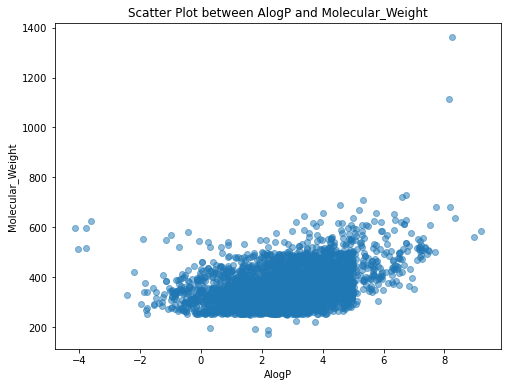

In [17]:
# 'AlogP'와 'Molecular_Weight' 간의 관계를 산점도로 시각화
plt.figure(figsize=(8, 6))
plt.scatter(train_data['AlogP'], train_data['Molecular_Weight'], alpha=0.5)
plt.xlabel('AlogP')
plt.ylabel('Molecular_Weight')
plt.title('Scatter Plot between AlogP and Molecular_Weight')
plt.show()


In [20]:
# 문자열 범주형 변수 추출
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

# 결과 출력
print("범주형 변수:")
print(categorical_columns)

범주형 변수:
['id', 'SMILES']


In [31]:
!pip install rdkit-pypi


In [32]:
from rdkit import Chem
from rdkit.Chem import Draw

# 예시 SMILES 표기법
smiles = 'CCO'  # 이 부분을 분자의 SMILES 표기법으로 대체하세요.

# SMILES를 분자 구조로 변환
mol = Chem.MolFromSmiles(smiles)

# 분자 구조 시각화
img = Draw.MolToImage(mol)
img.show()


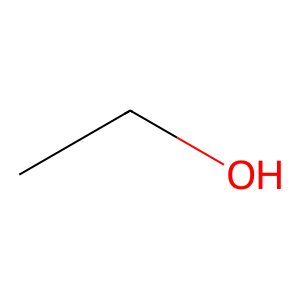

In [33]:
img